# Objective

*  Reduction of parameters 
*  Introduction of Learning Rate incorporated with Adam optimizer.
*  Keeping dropout value minimum

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing all the necessary libraries and the MNSIT dataset from Keras.

* MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Printing the shape of the input data and Displaying the First image using MATPLOTLIB



(60000, 28, 28)


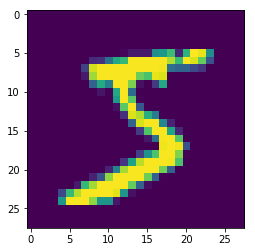

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set



In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Printing the output of the first 10 data after One Hot Encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
 model = Sequential()

 
model.add(Conv2D(24, (3, 3), activation='relu', input_shape=(28,28,1), use_bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3), activation='relu', use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), activation='relu', use_bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D()) # 11
model.add(Conv2D(10, (1, 1), activation='relu', use_bias=False)) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3), activation='relu', use_bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), activation='relu', use_bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, activation='relu', use_bias=False)) #7
model.add(Conv2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 24)        216       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 24)        96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        2592      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1728      
__________


Compiling the model based on following:

1. Optimization method: We are using 'ADAM' optimization method here.

2. For loss function we are using: binary crossentropy

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.004 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0058), metrics=['accuracy'])

Start training the model:

1. Batch size: set to 64
2. Epochs: set to 15

In [25]:
model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
60000/60000 [==============================] - 12s 202us/step - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0077 - val_acc: 0.9976
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030326005.
60000/60000 [==============================] - 12s 207us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 0.0054 - val_acc: 0.9982
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024420024.
60000/60000 [==============================] - 12s 199us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0056 - val_acc: 0.9981
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020439448.
60000/60000 [==============================] - 11s 180us/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.0055 - val_acc: 0.9981
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017574692.
60000/60000 [==

Evaluating the model performance



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing the model performance Score



In [27]:
print(score)

[0.004915903168195928, 0.9986899965286254]


# Obeservation

* Reduction in parameters
* Adding Learning rate in Adam optimizer helped in reaching the desired Validation score and also surpassing it.
* The network became more efficient than third model in terms of runtime

In [0]:
y_pred = model.predict(X_test)

In [29]:
print(y_pred[:9])
print(y_test[:9])

[[1.23382042e-11 2.21393659e-09 1.96901571e-08 3.73375642e-08
  1.51782688e-12 1.63475136e-12 3.08386684e-19 9.99999881e-01
  7.18459783e-14 7.88051793e-08]
 [2.48168419e-07 1.62350613e-08 9.99999762e-01 2.18323849e-11
  1.32865519e-09 9.81823672e-13 3.66646589e-08 3.16399012e-12
  1.62790859e-09 2.01609059e-11]
 [5.13729025e-11 9.99999523e-01 6.58145005e-09 5.70989402e-11
  1.97090017e-07 3.52119258e-08 1.55068389e-10 2.74378181e-07
  1.09786014e-10 1.84343041e-09]
 [9.99994278e-01 1.27547005e-15 1.17831238e-08 2.75772316e-09
  1.35430012e-09 2.07402562e-09 1.63264565e-06 6.43271287e-12
  1.26055284e-07 3.97299118e-06]
 [4.41033321e-11 6.64508205e-12 4.78600715e-09 7.55750584e-12
  9.99882221e-01 4.92993632e-11 2.07131445e-09 1.37188105e-09
  7.21791835e-08 1.17728639e-04]
 [1.15244503e-09 9.99998927e-01 1.25244570e-08 9.46301544e-12
  3.51572652e-07 6.36779407e-10 6.80961676e-11 6.95585641e-07
  1.68331474e-10 3.04200931e-09]
 [2.37491812e-16 1.16737624e-07 4.22059809e-09 5.84592162e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


KeyError: ignored